In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

In [ ]:
# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Display column names
print(mcdonalds.columns.tolist())

# Check the dimensions of the dataset
print(mcdonalds.shape)  # Rows and columns

# Display the first 3 rows of the dataset
print(mcdonalds.head(3))


['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [ ]:
# Assuming mcdonalds is already loaded as a DataFrame
# Select columns 1 to 11 (Python is 0-indexed, so use 0:11)
MD_x = mcdonalds.iloc[:, 0:11]

# Convert the dataset to a binary matrix where "Yes" = 1 and anything else = 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate column means and round to 2 decimal places
column_means = MD_x.mean().round(2)

# Display the column means
print(column_means)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [ ]:
# Perform PCA on the binary data (MD_x)
pca = PCA()
pca.fit(MD_x)

# Display the explained variance and cumulative variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Print the results
print("Standard Deviations (Principal Components):")
print(pca.singular_values_)  # Standard deviation (equivalent to R's 'Standard deviation')

print("\nProportion of Variance:")
print(explained_variance)  # Proportion of variance explained by each component

print("\nCumulative Proportion of Variance:")
print(cumulative_variance)  # Cumulative proportion of variance

# Optionally, you can display the number of components and their importance
components = pd.DataFrame(pca.components_, columns=MD_x.columns)
print("\nPrincipal Components (Loadings):")
print(components)


Standard Deviations (Principal Components):
[28.84746118 23.14716582 19.22858381 15.19626736 12.85685762 11.82305052
 11.03895052 10.48355462 10.10742431  9.48214684  9.02721076]

Proportion of Variance:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]

Cumulative Proportion of Variance:
[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]

Principal Components (Loadings):
       yummy  convenient     spicy  fattening    greasy      fast     cheap  \
0   0.476933    0.155332  0.006356  -0.116232 -0.304443  0.108493  0.337186   
1  -0.363790   -0.016414 -0.018809   0.034094  0.063839  0.086972  0.610633   
2   0.304444    0.062515  0.037019   0.322359  0.802373  0.064642  0.149310   
3   0.055162   -0.142425  0.197619  -0.354139  0.253960 -0.097363  0.118958   
4   0.307535   -0.277608 -0.070620   0.073405 -0.361399 -0.107930  0.128973   
5  -

In [ ]:

# Perform PCA on the binary data (MD_x)
pca = PCA()
pca.fit(MD_x)

# Standard Deviations (Square root of eigenvalues)
print("Standard Deviations (Principal Components):")
print(np.round(pca.singular_values_, 1))  # Round to 1 decimal place

# Proportion of Variance Explained
print("\nProportion of Variance Explained by Each Component:")
print(np.round(pca.explained_variance_ratio_, 3))  # Round to 3 decimal places

# Cumulative Proportion of Variance Explained
print("\nCumulative Proportion of Variance Explained:")
print(np.round(pca.explained_variance_ratio_.cumsum(), 3))  # Cumulative variance

# Rotation matrix (Loadings for each principal component)
print("\nPrincipal Component Loadings (Rotation Matrix):")
rotation_matrix = pd.DataFrame(pca.components_, columns=MD_x.columns)
print(rotation_matrix.round(3))  # Round loadings to 3 decimal places


Standard Deviations (Principal Components):
[28.8 23.1 19.2 15.2 12.9 11.8 11.  10.5 10.1  9.5  9. ]

Proportion of Variance Explained by Each Component:
[0.299 0.193 0.133 0.083 0.059 0.05  0.044 0.04  0.037 0.032 0.029]

Cumulative Proportion of Variance Explained:
[0.299 0.492 0.625 0.708 0.768 0.818 0.862 0.902 0.938 0.971 1.   ]

Principal Component Loadings (Rotation Matrix):
    yummy  convenient  spicy  fattening  greasy   fast  cheap  tasty  \
0   0.477       0.155  0.006     -0.116  -0.304  0.108  0.337  0.472   
1  -0.364      -0.016 -0.019      0.034   0.064  0.087  0.611 -0.307   
2   0.304       0.063  0.037      0.322   0.802  0.065  0.149  0.287   
3   0.055      -0.142  0.198     -0.354   0.254 -0.097  0.119 -0.003   
4   0.308      -0.278 -0.071      0.073  -0.361 -0.108  0.129  0.211   
5  -0.171       0.348  0.355      0.407  -0.209  0.595  0.103  0.077   
6  -0.281      -0.060  0.708     -0.386   0.036 -0.087 -0.040  0.360   
7  -0.013       0.113 -0.376     -0.590

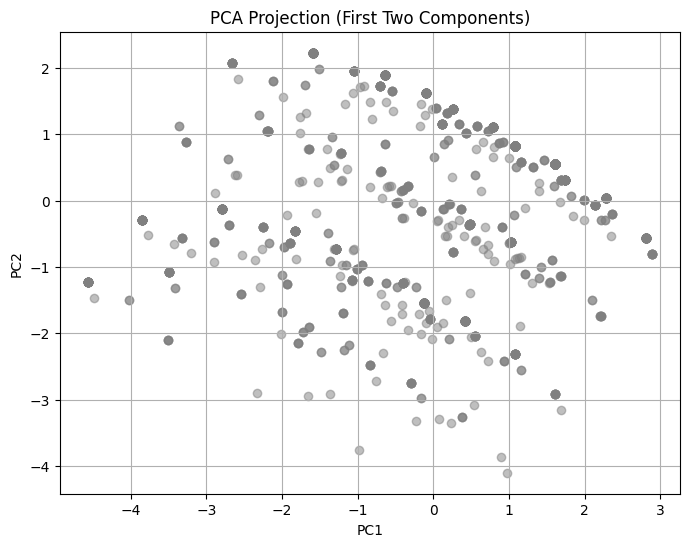

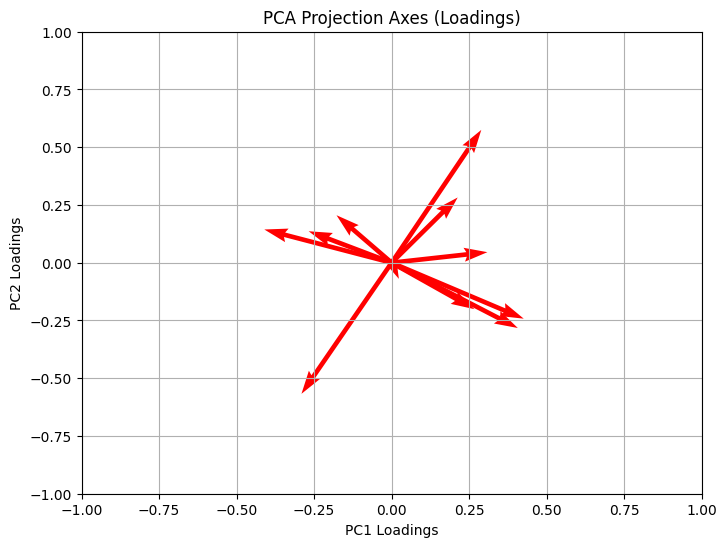

In [ ]:
# Standardize the data before applying PCA
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# Perform PCA on the standardized data
pca = PCA()
pca.fit(MD_x_scaled)

# Project the data onto the first two principal components
pca_projection = pca.transform(MD_x_scaled)

# Plot the PCA projections (first two principal components)
plt.figure(figsize=(8, 6))
plt.scatter(pca_projection[:, 0], pca_projection[:, 1], color="grey", alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection (First Two Components)")
plt.grid(True)
plt.show()

# Plot the projection axes (the loadings of the first two components)
plt.figure(figsize=(8, 6))
plt.quiver(np.zeros(len(MD_x.columns)), np.zeros(len(MD_x.columns)), pca.components_[0, :], pca.components_[1, :],
           angles='xy', scale_units='xy', scale=1, color='red')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("PC1 Loadings")
plt.ylabel("PC2 Loadings")
plt.title("PCA Projection Axes (Loadings)")
plt.grid(True)
plt.show()

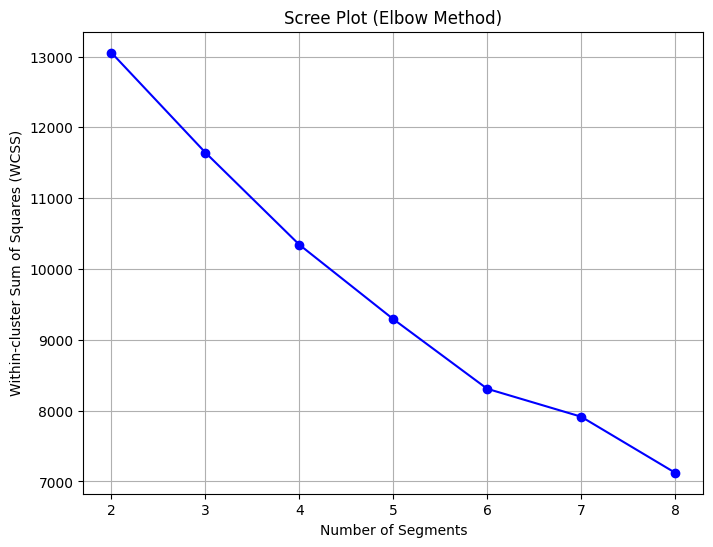

In [ ]:
# Set random seed for reproducibility
np.random.seed(1234)

# Store within-cluster sum of squares for each number of clusters
wcss = []

# Perform k-means clustering for 2 to 8 clusters with 10 random restarts (n_init=10)
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is the sum of squared distances to the closest centroid

# Plotting the Scree plot (Elbow method)
plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), wcss, marker='o', color='b')
plt.title('Scree Plot (Elbow Method)')
plt.xlabel('Number of Segments')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

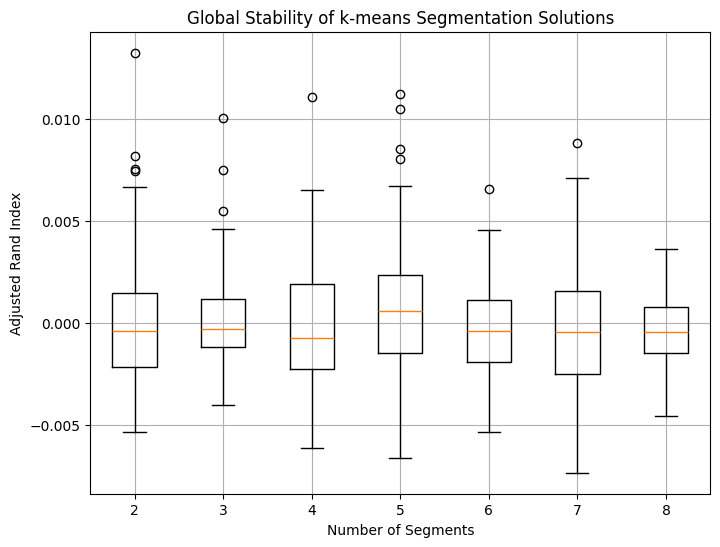

In [ ]:

# Number of bootstrap samples and range of k
nboot = 100
k_range = range(2, 9)
nrep = 10

# Initialize empty list to store ARI scores
global_stability_scores = {k: [] for k in k_range}

# Perform bootstrap resampling and calculate ARI
for k in k_range:
    for _ in range(nboot):
        # Create a bootstrap sample
        bootstrap_sample = resample(MD_x_scaled, replace=True, n_samples=MD_x_scaled.shape[0])

        # Perform k-means with multiple random initializations
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        kmeans.fit(bootstrap_sample)

        # Calculate ARI with the original data (true labels could be from the original clustering)
        # Here, we assume you have a way of determining true labels (e.g., from a previous run)
        # Example of comparing with true labels:
        original_kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        original_kmeans.fit(MD_x_scaled)

        # Calculate Adjusted Rand Index (ARI)
        ari = adjusted_rand_score(original_kmeans.labels_, kmeans.labels_)
        global_stability_scores[k].append(ari)

# Plotting the boxplot for Global Stability (Adjusted Rand Index)
plt.figure(figsize=(8, 6))
plt.boxplot([global_stability_scores[k] for k in k_range], labels=k_range)
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability of k-means Segmentation Solutions')
plt.grid(True)
plt.show()

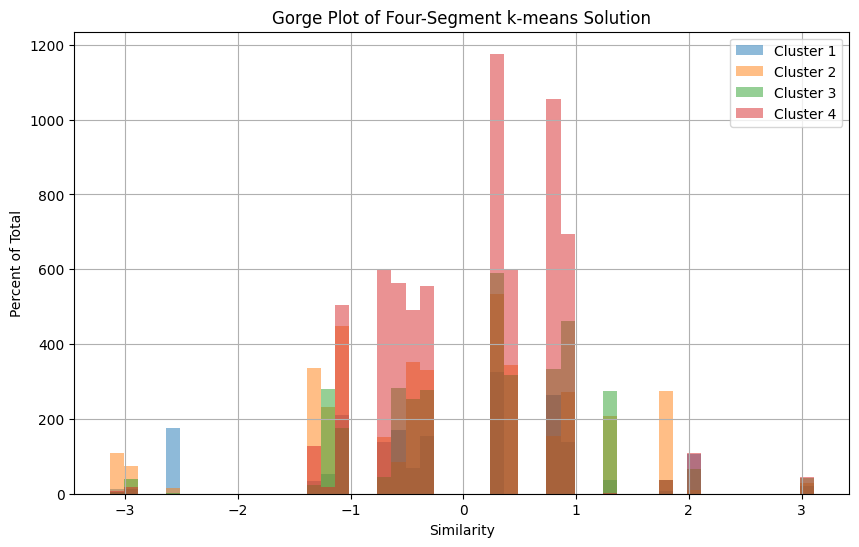

In [ ]:
# Assuming MD.k4 is the 4-segment k-means solution and MD_x_scaled is standardized
kmeans_4 = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans_4.fit(MD_x_scaled)

# Get cluster labels
labels = kmeans_4.labels_

# Plot histograms for each cluster
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.hist(MD_x_scaled[labels == i, :].flatten(), bins=50, alpha=0.5, label=f'Cluster {i+1}')

plt.xlabel('Similarity')
plt.ylabel('Percent of Total')
plt.title('Gorge Plot of Four-Segment k-means Solution')
plt.legend()
plt.grid(True)
plt.show()


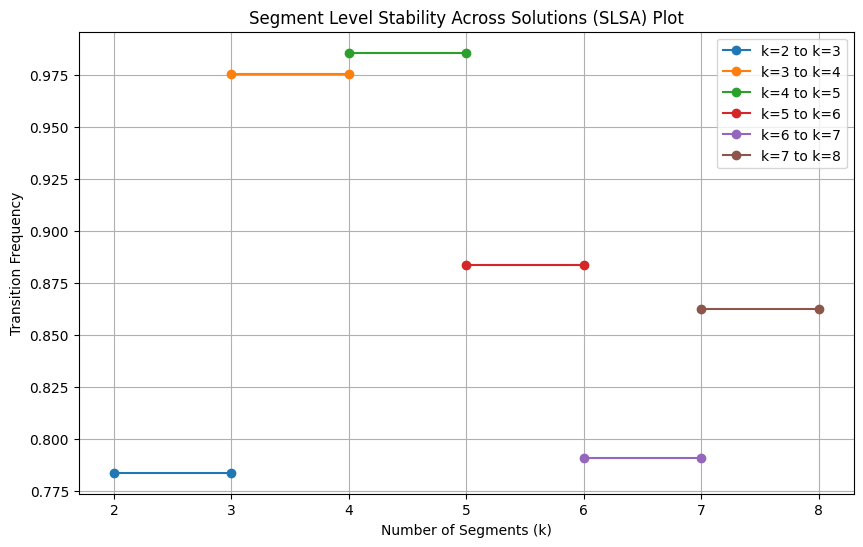

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming MD_x_scaled is your standardized dataset

# Run k-means for multiple values of k (2 to 8 segments)
segment_stability = {k: KMeans(n_clusters=k, n_init=10, random_state=1234).fit_predict(MD_x_scaled) for k in range(2, 9)}

# Plotting segment-level stability across solutions (SLSA)
plt.figure(figsize=(10, 6))

# We'll track transitions of cluster membership across different k values
for k in range(2, 8):
    # Calculate the number of data points that change their cluster label between k and k+1
    transitions = (segment_stability[k] != segment_stability[k + 1]).mean()  # Mean transition across all points
    plt.plot([k, k + 1], [transitions, transitions], marker='o', label=f'k={k} to k={k+1}')

plt.xlabel('Number of Segments (k)')
plt.ylabel('Transition Frequency')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.legend()
plt.grid(True)
plt.show()


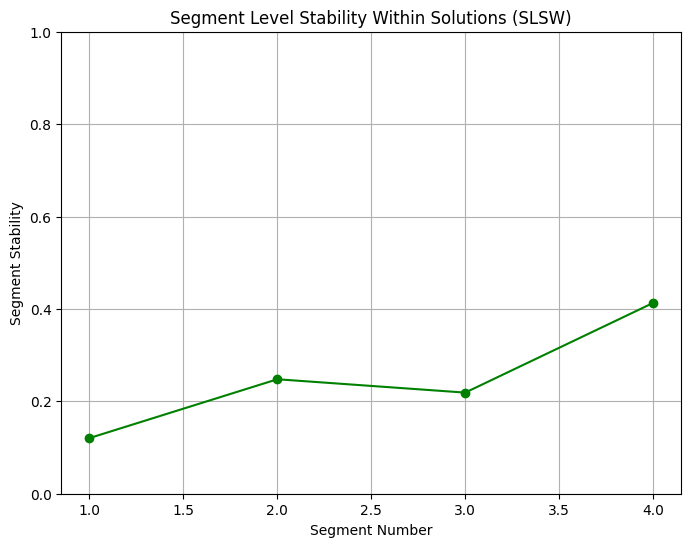

In [ ]:
# Compute segment-level stability within a single solution (e.g., 4 segments)
kmeans_4 = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans_4.fit(MD_x_scaled)
labels = kmeans_4.labels_

# Segment stability within solution (SLSW)
segment_stability_within = []
for i in range(4):
    segment_members = (labels == i)
    stability = segment_members.mean()  # Proportion of times the segment is stable across replications
    segment_stability_within.append(stability)

# Plotting the SLSW plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 5), segment_stability_within, marker='o', color='g')
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.title('Segment Level Stability Within Solutions (SLSW)')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


## CONTINUATION

Cluster centers: 
[[0.80837357 1.         0.09017704 0.82447663 0.42028979 0.95974246
  0.88888889 1.         0.         0.28502409 0.07246368]
 [0.         0.72047244 0.10629921 0.92125984 0.68897638 0.76377953
  0.09055118 0.22440945 1.         0.06692913 0.59055118]
 [0.         0.84837545 0.06498195 0.89530686 0.59205776 0.91696751
  0.83032491 0.01805054 0.         0.08303249 0.433213  ]
 [1.         0.93023258 0.11627925 0.88372096 0.54817286 0.8770762
  0.21594701 0.8405316  0.88372071 0.23920281 0.12624602]]
Cluster covariances: 
[[[ 1.54906742e-01  0.00000000e+00 -5.26398083e-03 -7.87001870e-03
   -1.28591239e-02  3.37122623e-04  1.09142975e-02  0.00000000e+00
    0.00000000e+00  2.56326382e-02 -1.50995550e-02]
  [ 0.00000000e+00  1.00000000e-06  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [-5.26398083e-03  0.00000000e+00  8.20461451e-02 -6.71610733e-03
   -8.63549152e-0

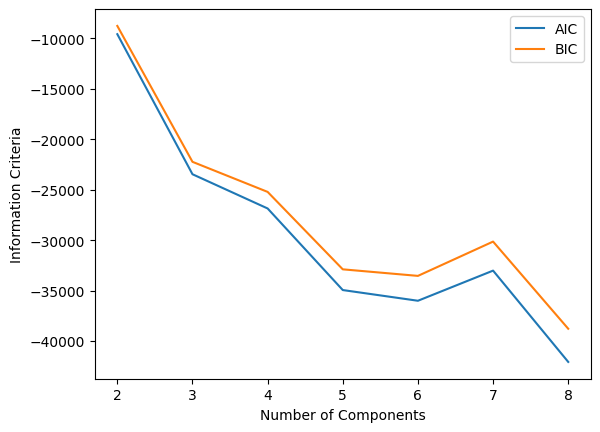

In [ ]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(1234)

# Assume 'MD_x' is your dataset as a NumPy array or DataFrame
# Example: MD_x = pd.DataFrame(data)

# Fit a Gaussian Mixture Model (this is for continuous data, use for illustration)
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm.fit(MD_x)

# Extract results
labels = gmm.predict(MD_x)
print(f'Cluster centers: \n{gmm.means_}')
print(f'Cluster covariances: \n{gmm.covariances_}')

# Plot the AIC, BIC values for the number of components (clusters)
n_components_range = range(2, 9)
aic_values = []
bic_values = []

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=1234)
    gmm.fit(MD_x)
    aic_values.append(gmm.aic(MD_x))
    bic_values.append(gmm.bic(MD_x))

# Plot the AIC, BIC, and ICL values
plt.plot(n_components_range, aic_values, label="AIC")
plt.plot(n_components_range, bic_values, label="BIC")
plt.xlabel('Number of Components')
plt.ylabel('Information Criteria')
plt.legend()
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Assume `MD_x` is your data
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans_labels = kmeans.fit_predict(MD_x)

# Cross-tabulation between K-means and Gaussian Mixture Labels
pd.crosstab(kmeans_labels, labels)


col_0,0,1,2,3
row_0,,,,
0,546,0,1,33
1,0,213,11,4
2,46,3,265,8
3,29,38,0,256


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical features (e.g., 'Gender' and 'VisitFrequency')
label_encoder = LabelEncoder()

# Apply encoding to any categorical columns, such as 'Gender' and 'VisitFrequency'
categorical_columns = ['Gender', 'VisitFrequency']
for col in categorical_columns:
    mcdonalds[col] = label_encoder.fit_transform(mcdonalds[col])

# Define X (features) and y (target variable)
X = mcdonalds.drop('Like', axis=1)  # Drop the target variable 'Like'
y = mcdonalds['Like']  # Target variable 'Like'


In [ ]:
print(mcdonalds.columns)


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [ ]:
# Check which columns in X are non-numeric
non_numeric_cols = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to any categorical columns in X
label_encoder = LabelEncoder()

# Encode all non-numeric columns
for col in non_numeric_cols:
    X[col] = label_encoder.fit_transform(X[col])

# Now X should only contain numeric values, ready for the GaussianMixture model


Non-numeric columns: Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting'],
      dtype='object')


In [ ]:
# Fit a Gaussian Mixture model as a mixture of regressions
gmm_reg = GaussianMixture(n_components=2, random_state=1234)
gmm_reg.fit(X)

# Predict labels based on the mixture model
labels = gmm_reg.predict(X)

# Fit regression models for each component (segment)
reg_models = []
for i in range(gmm_reg.n_components):
    segment_X = X[labels == i]
    segment_y = y[labels == i]
    reg_model = LogisticRegression()
    reg_model.fit(segment_X, segment_y)
    reg_models.append(reg_model)

# Example: Predicting with the regression models for each segment
predictions = [model.predict(X) for model in reg_models]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

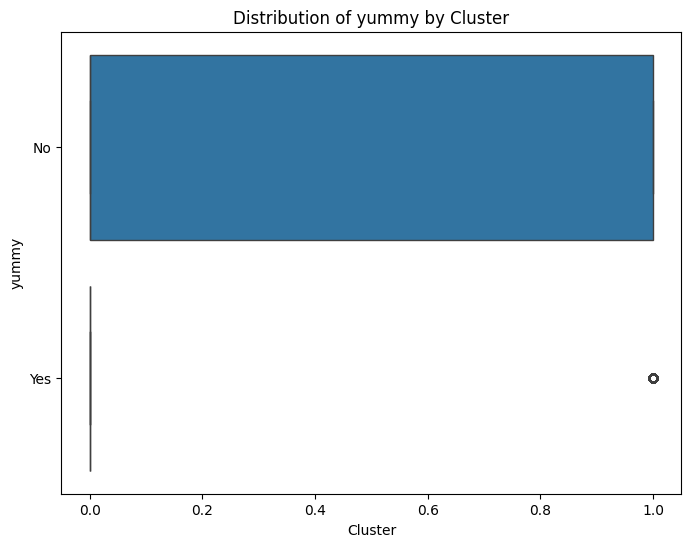

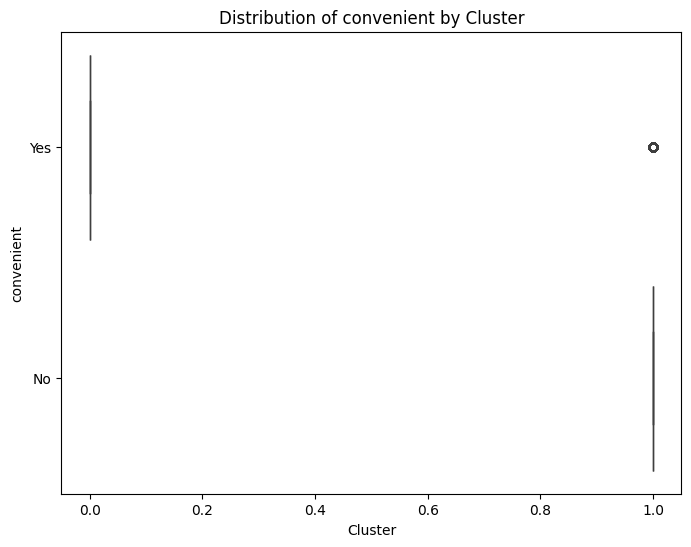

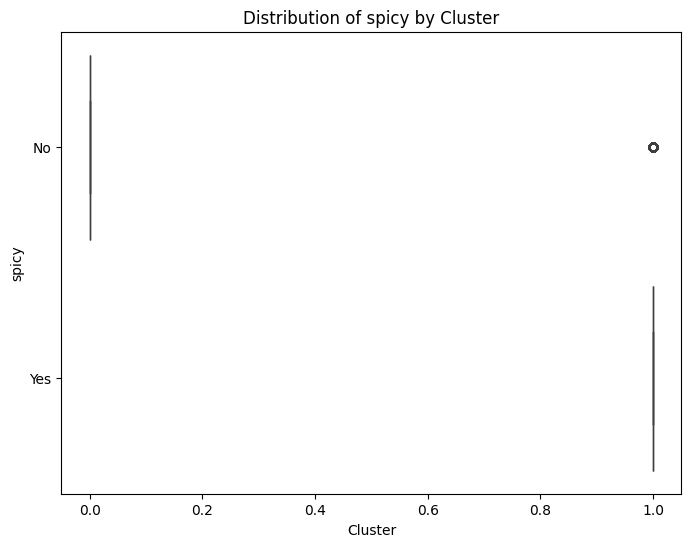

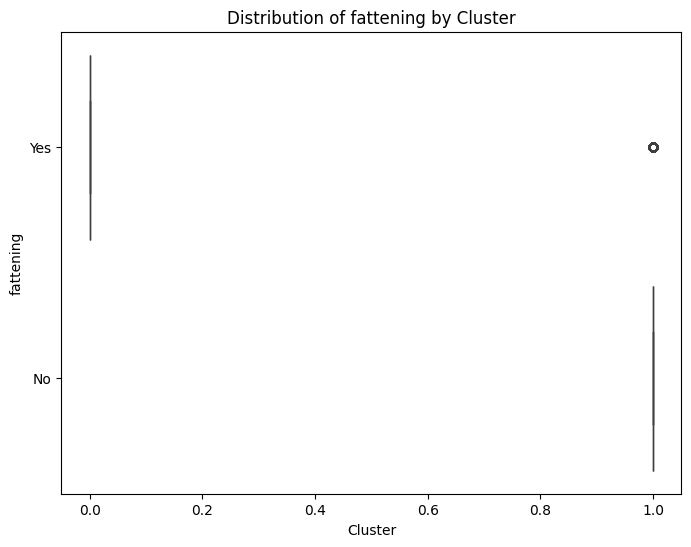

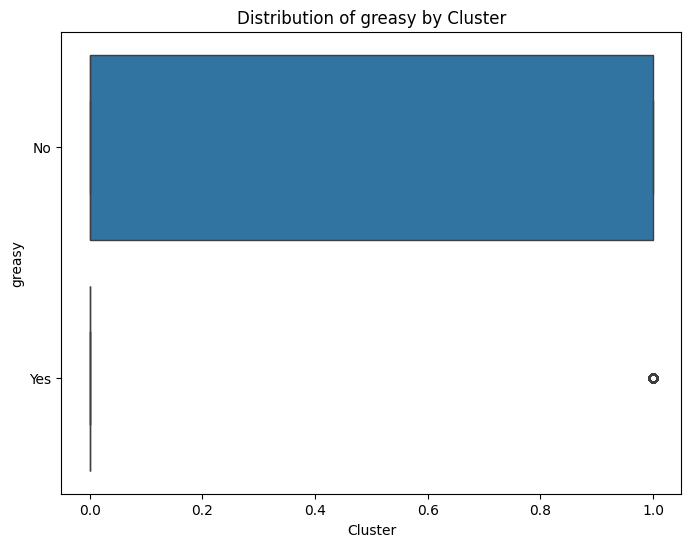

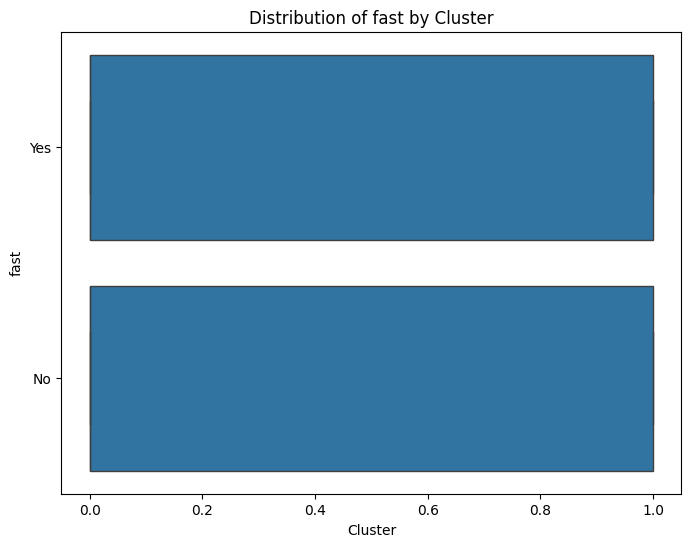

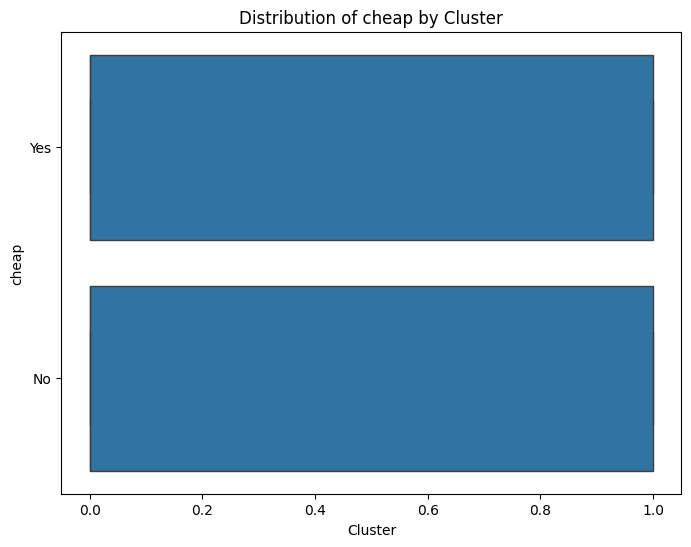

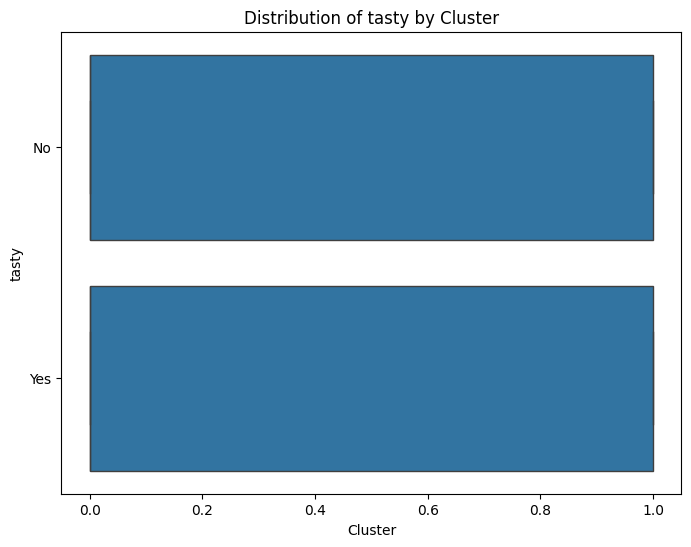

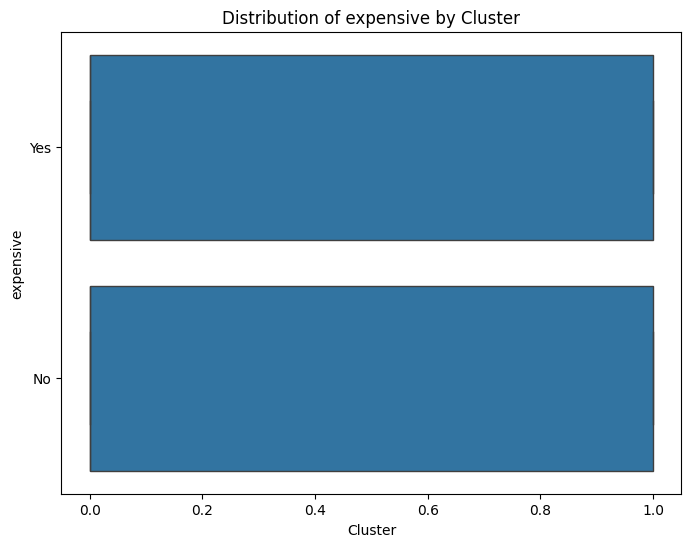

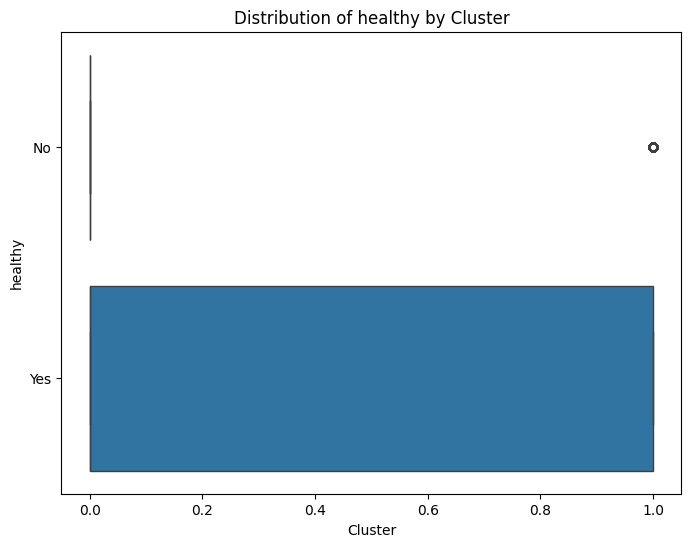

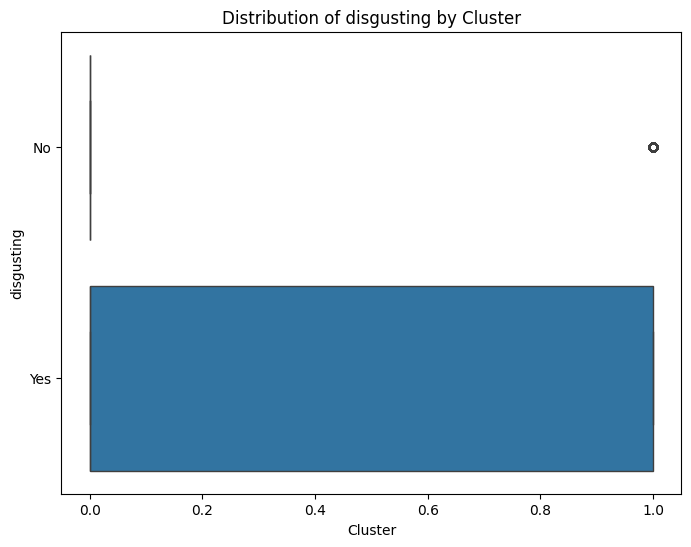

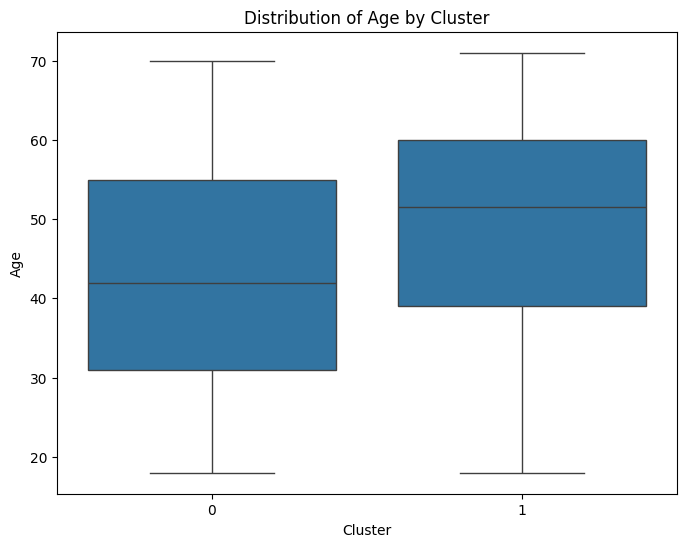

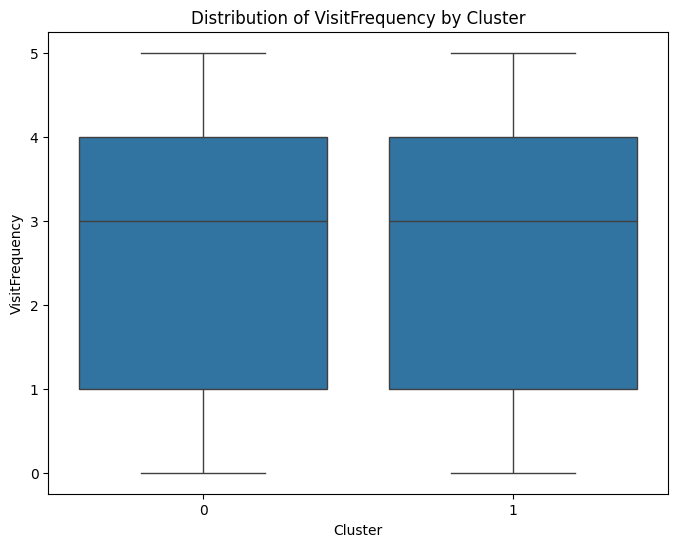

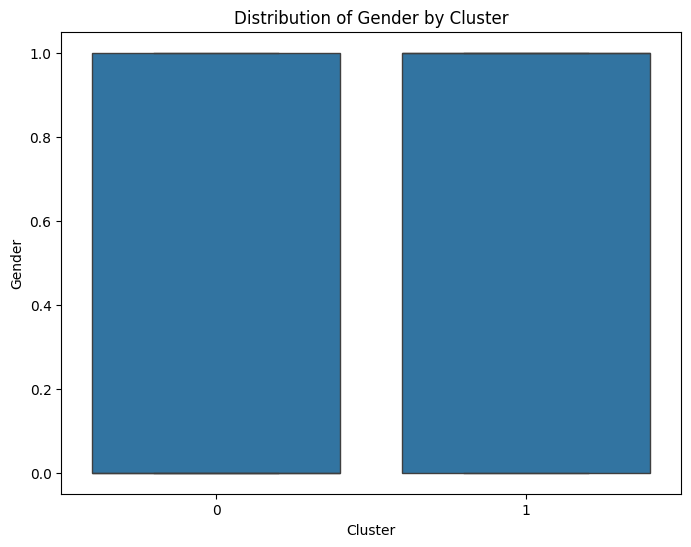

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Adding cluster labels to the original dataset
mcdonalds['Cluster'] = labels  # 'labels' are from the GMM model

# Plot the distribution of numerical features by cluster
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Barplot for each numerical variable
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=col, data=mcdonalds)
    plt.title(f"Distribution of {col} by Cluster")
    plt.show()

# Plot the distribution of categorical features (encoded)
categorical_cols = X.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='Cluster', data=mcdonalds)
    plt.title(f"Distribution of {col} by Cluster")
    plt.show()


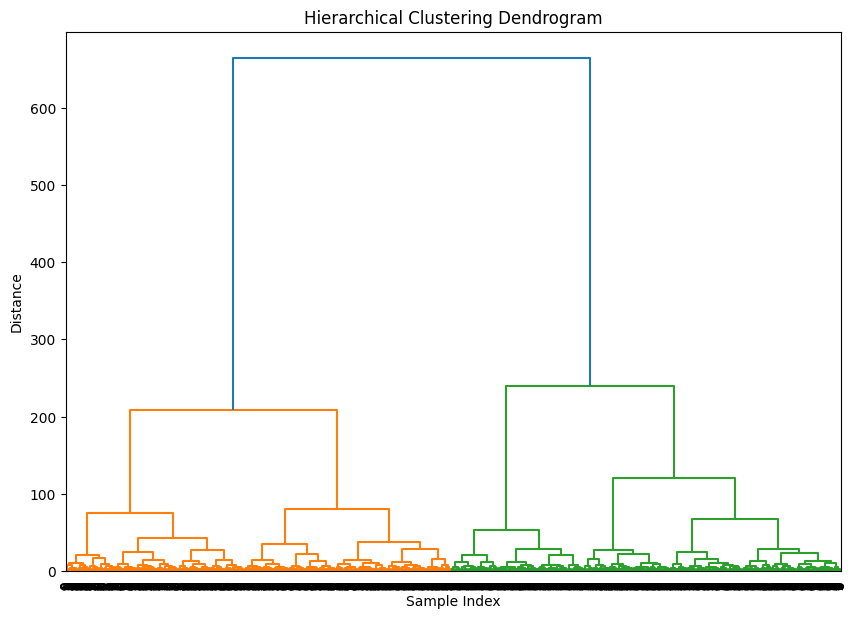

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Using linkage to calculate the hierarchical clustering
Z = linkage(X, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=mcdonalds['Cluster'].values, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


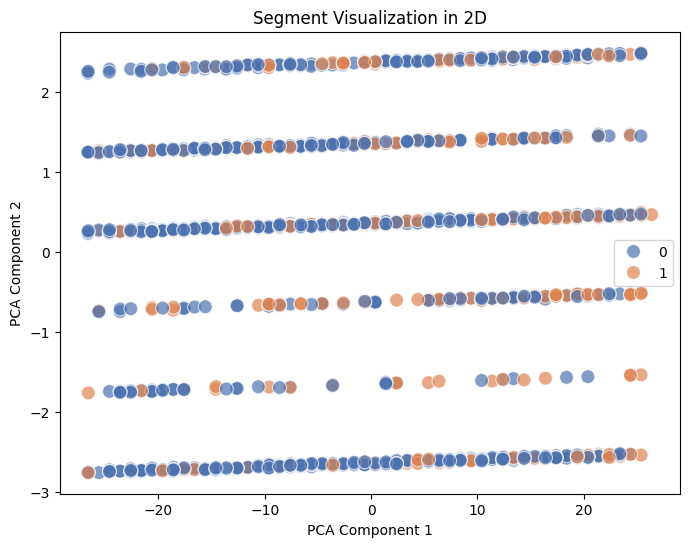

In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot segments in 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="deep", s=100, alpha=0.7)
plt.title("Segment Visualization in 2D")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


Like_n
3.0     229
4.0     187
6.0     169
2.0     160
5.0     152
9.0      73
10.0     71
8.0      59
7.0      58
Name: count, dtype: int64
Age               int64
VisitFrequency    int64
Gender            int64
Cluster           int64
dtype: object
   Age  VisitFrequency  Gender  Cluster
0   61               0       0        0
1   51               0       0        0
2   62               0       0        1
3   69               4       0        0
4   49               3       1        0
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age  Visi

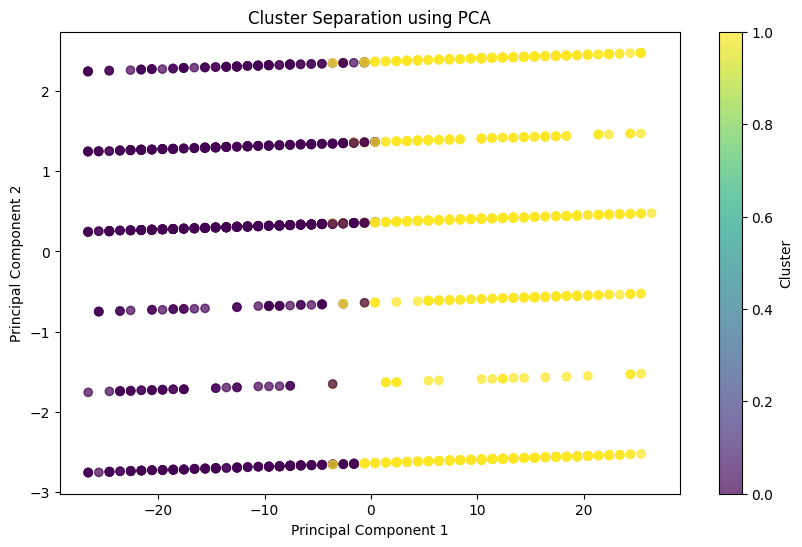

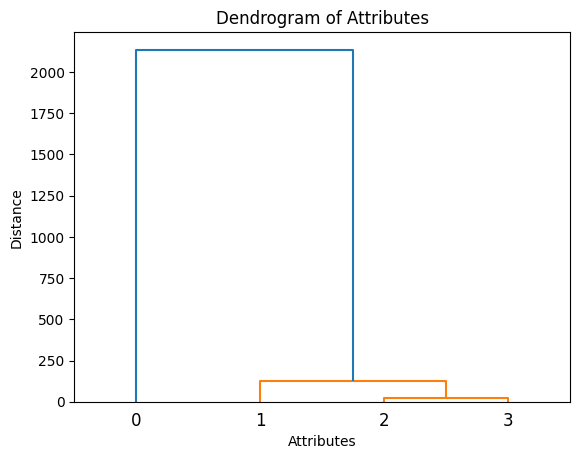

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram

# Assuming 'mcdonalds' is your DataFrame containing the dataset

# Step 1: Preprocessing (Converting the LIKE variable to a numeric scale)
# Ensure 'Like' column is numeric, handling potential non-numeric values
# Convert 'Like' scale to numeric (if needed, based on context)
mcdonalds['Like_n'] = 6 - pd.to_numeric(mcdonalds['Like'], errors='coerce')
print(mcdonalds['Like_n'].value_counts())

# Step 2: Fitting a Finite Mixture Model (Using GaussianMixture as an alternative to Flexmix)
# Exclude 'Like' and 'Like_n' from independent variables
X = mcdonalds.drop(columns=['Like', 'Like_n'])

# Handle any non-numeric columns by converting them to numeric or excluding them
X = X.select_dtypes(include=[np.number])  # Keep only numeric columns

# If there are categorical columns (e.g., 'Yes'/'No'), we need to map them to numeric values
# Example: If 'Yes'/'No' columns exist, you can do this:
# X['SomeColumn'] = X['SomeColumn'].map({'Yes': 1, 'No': 0})

print(X.dtypes)  # Check the data types of the columns
print(X.head())   # Preview the first few rows of the data

# Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=1234)
gmm.fit(X)

# Step 3: Predicting the clusters based on GMM
mcdonalds['Cluster'] = gmm.predict(X)
print(mcdonalds.head())

# Step 4: Cross-tabulation of KMeans and GMM clusters (assuming MD.k4 is a pre-existing KMeans model)
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(X)
mcdonalds['KMeans_Cluster'] = kmeans.labels_

# Cross-tabulation of KMeans and GMM clusters
cross_tab = pd.crosstab(mcdonalds['KMeans_Cluster'], mcdonalds['Cluster'])
print(cross_tab)

# Step 5: Plotting Information Criteria (AIC, BIC for GMM)
# You can extract these from the GMM object:
print("AIC: ", gmm.aic(X))
print("BIC: ", gmm.bic(X))

# Step 6: Profiling Segments - PCA to reduce dimensions for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting the clusters using PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=mcdonalds['Cluster'], cmap='viridis', alpha=0.7)
plt.title('Cluster Separation using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Step 7: Hierarchical Clustering on Attributes (instead of consumers)
Z = linkage(X.T, 'ward')  # Hierarchical clustering on transposed data
dendrogram(Z)
plt.title('Dendrogram of Attributes')
plt.xlabel('Attributes')
plt.ylabel('Distance')
plt.show()

# Profiling Segments (Similar to segment profile plot)
# Here we need to profile based on significant features
profile_data = mcdonalds.groupby('Cluster').mean()  # Example, adjust for significance profiling
print(profile_data)

# Step 8: Segment Separation Plot (again using PCA for visualization)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=mcdonalds['Cluster'], cmap='coolwarm')
plt.title('Segment Separation Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


Like_n
3.0     229
4.0     187
6.0     169
2.0     160
5.0     152
9.0      73
10.0     71
8.0      59
7.0      58
Name: count, dtype: int64
Age               int64
VisitFrequency    int64
Gender            int64
Cluster           int64
KMeans_Cluster    int32
dtype: object
   Age  VisitFrequency  Gender  Cluster  KMeans_Cluster
0   61               0       0        1               3
1   51               0       0        1               1
2   62               0       0        1               3
3   69               4       0        1               3
4   49               3       1        1               1
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No 

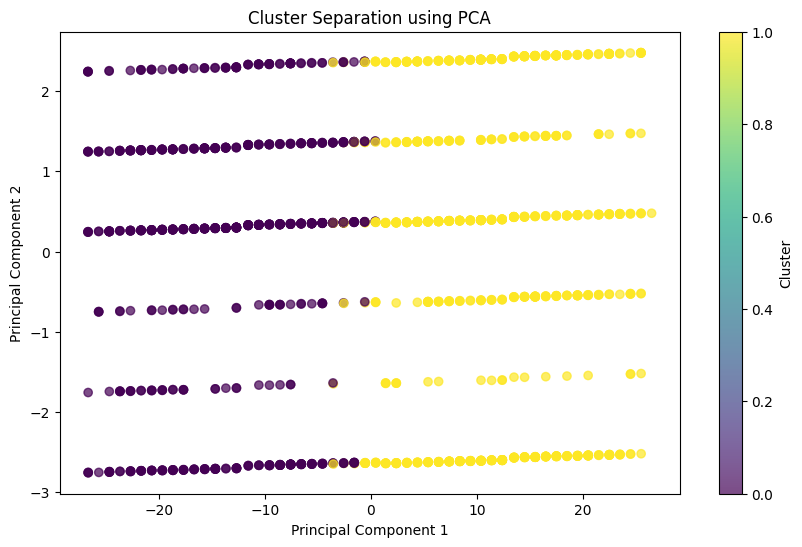

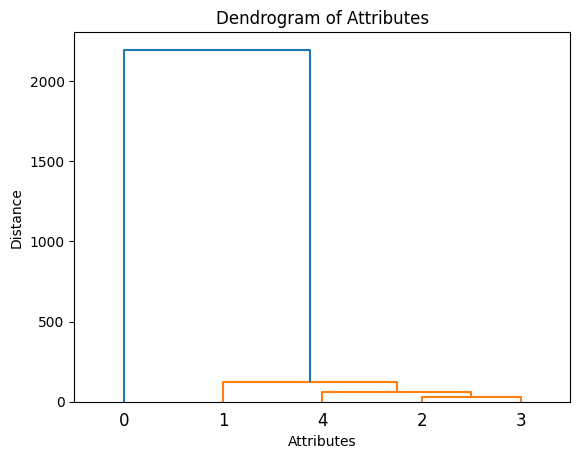

               Age  VisitFrequency    Gender  Cluster    Like_n  \
Cluster                                                           
0        31.511013        2.734214  0.466960      0.0  4.532833   
1        56.155440        2.553109  0.449482      1.0  5.372800   

         KMeans_Cluster  
Cluster                  
0              0.936858  
1              1.935233  


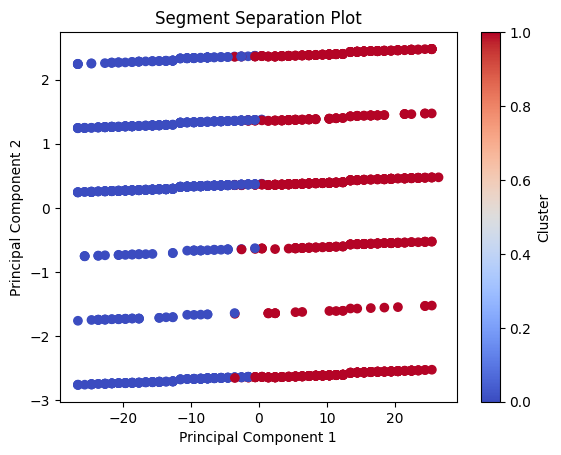

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram

# Assuming 'mcdonalds' is your DataFrame containing the dataset

# Step 1: Preprocessing (Converting the LIKE variable to a numeric scale)
# Ensure 'Like' column is numeric, handling potential non-numeric values
# Convert 'Like' scale to numeric (if needed, based on context)
mcdonalds['Like_n'] = 6 - pd.to_numeric(mcdonalds['Like'], errors='coerce')
print(mcdonalds['Like_n'].value_counts())

# Step 2: Fitting a Finite Mixture Model (Using GaussianMixture as an alternative to Flexmix)
# Exclude 'Like' and 'Like_n' from independent variables
X = mcdonalds.drop(columns=['Like', 'Like_n'])

# Handle any non-numeric columns by converting them to numeric or excluding them
X = X.select_dtypes(include=[np.number])  # Keep only numeric columns

# If there are categorical columns (e.g., 'Yes'/'No'), we need to map them to numeric values
# Example: If 'Yes'/'No' columns exist, you can do this:
# For example, converting 'Yes'/'No' into 1/0
yes_no_columns = X.select_dtypes(include=[object]).columns
for col in yes_no_columns:
    X[col] = X[col].map({'Yes': 1, 'No': 0})

print(X.dtypes)  # Check the data types of the columns
print(X.head())   # Preview the first few rows of the data

# Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=1234)
gmm.fit(X)

# Step 3: Predicting the clusters based on GMM
mcdonalds['Cluster'] = gmm.predict(X)
print(mcdonalds.head())

# Step 4: Cross-tabulation of KMeans and GMM clusters (assuming MD.k4 is a pre-existing KMeans model)
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(X)
mcdonalds['KMeans_Cluster'] = kmeans.labels_

# Cross-tabulation of KMeans and GMM clusters
cross_tab = pd.crosstab(mcdonalds['KMeans_Cluster'], mcdonalds['Cluster'])
print(cross_tab)

# Step 5: Plotting Information Criteria (AIC, BIC for GMM)
# You can extract these from the GMM object:
print("AIC: ", gmm.aic(X))
print("BIC: ", gmm.bic(X))

# Step 6: Profiling Segments - PCA to reduce dimensions for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting the clusters using PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=mcdonalds['Cluster'], cmap='viridis', alpha=0.7)
plt.title('Cluster Separation using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Step 7: Hierarchical Clustering on Attributes (instead of consumers)
Z = linkage(X.T, 'ward')  # Hierarchical clustering on transposed data
dendrogram(Z)
plt.title('Dendrogram of Attributes')
plt.xlabel('Attributes')
plt.ylabel('Distance')
plt.show()

# Profiling Segments (Similar to segment profile plot)
# Here we need to profile based on significant features
# Exclude non-numeric columns for mean calculation
numeric_columns = mcdonalds.select_dtypes(include=[np.number]).columns
profile_data = mcdonalds.groupby('Cluster')[numeric_columns].mean()  # Calculate mean for numeric columns
print(profile_data)

# Step 8: Segment Separation Plot (again using PCA for visualization)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=mcdonalds['Cluster'], cmap='coolwarm')
plt.title('Segment Separation Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
